# Determine polynomial functions of degree 2

From the graph $y=f(x)$ of a polynomial function $f$ of degree 2 the following three points are known:
$P(2|4)$, $Q(3|5)$, $R(-1|-3)$

Determine the equation of this function 

- in its normal form, $f(x) = a\,x^2 + b\,x + c$, and
- in its vertex form, $f_s(x) = a_s\,(x-x_s)^2 + y_s$

In [1]:
# initialisations

from sympy import *
init_printing()

import matplotlib.pyplot as plt

# usually you want this
%matplotlib inline 

# useful for OS X
%config InlineBackend.figure_format='retina' 

import numpy as np

from IPython.display import display, Math

from fun_expr.function_from_expression import Function_from_Expression as FE

In [2]:
# define f
x = Symbol('x')

a,b,c = symbols('a,b,c')

f = FE(x, a*x**2 + b*x + c)
Math("f(x)="+latex(f(x)))

<IPython.core.display.Math object>

In [3]:
# define points and determine equations
pts = [(2,4),(3,5),(-1,-3)]

eqns = [Eq(f(x),y) for x,y in pts]

# display result
for eq in eqns:
    display(eq)

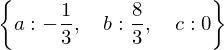

In [4]:
# solve eqnations
sol = solve(eqns)

# display results
sol

In [5]:
# substitute result into f
f = f.subs(sol)

# show result
Math("f(x)="+latex(f(x)))

<IPython.core.display.Math object>

To find the vertex form $f_s(x) = a_s\,(x-x_s)^2 + y_s$, a new function is defined

In [6]:
# define f_s
x = Symbol('x')
a_s, x_s, y_s = symbols('a_s,x_s,y_s')

f_s = FE(x, a_s*(x-x_s)**2 + y_s)
Math("f_s(x)="+latex(f_s(x)))

<IPython.core.display.Math object>

The expanded coefficients of $f_s$ must be equal to the coefficients of the known function $f$

In [7]:
c_s = [f_s(x).expand().coeff(x,i) for i in range(3)]
c_s

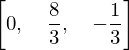

In [8]:
c = [f(x).coeff(x,i) for i in range(3)]
c

This leads to a system of equations:

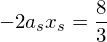

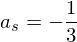

In [9]:
eqns_s = [Eq(v,w) for v,w in zip(c_s,c)]

for eq in eqns_s:
    display(eq)

This system of equations could also be archieved by

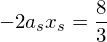

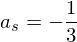

In [10]:
eqns_s = [Eq(f_s(x).expand().coeff(x,i),f(x).coeff(x,i)) for i in range(3)]

for eq in eqns_s:
    display(eq)

The solution gives the unknown values $a_s$, $x_s$ and $y_s$:

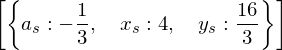

In [11]:
sol_s = solve(eqns_s)
sol_s

Since the system of equations is not linear, the solution is a list of possible solutions. This list contains only one dict of solutions.

In [12]:
# substitute sol_s into f_s
f_s = f_s.subs(*sol_s)
Math("f_s(x)="+latex(f_s(x)))

<IPython.core.display.Math object>

In [13]:
# f and f_s define essentially the same function.
f(x) == f_s(x).expand()

True

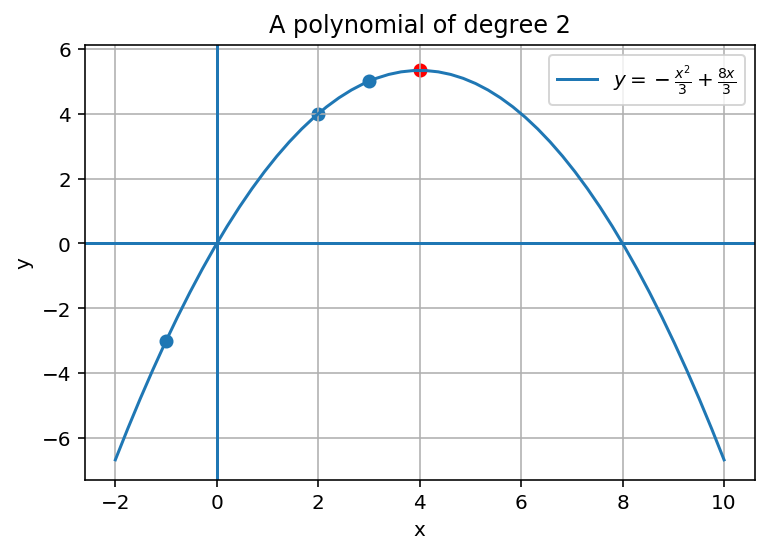

In [14]:
# init new plot
fig, ax = plt.subplots()

# redefine x_s
x_s = x_s.subs(*sol_s)
d = 6

# the interval along the x-axis
lx = np.linspace(float(x_s-d),float(x_s+d))

# plot f(x), the given points and the vertex
ax.plot(lx,f.lambdified(lx),label=r"$y={f}$".format(f=latex(f(x))))
ax.scatter(*zip(*pts))
ax.scatter(x_s,f(x_s),c='r')

# refine plot
ax.axhline(0)
ax.axvline(0)
ax.grid(True)
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A polynomial of degree 2')

# show result
plt.show()